In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 15
plt.rcParams['axes.unicode_minus'] = False


# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [2]:
# CSV 파일 불러오기
df = pd.read_csv('43_피처만.csv', encoding = 'utf-8-sig')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 43 columns):
 #   Column              Dtype
---  ------              -----
 0   입회일자_신용             int64
 1   탈회횟수_발급1년이내         int64
 2   _1순위카드이용건수          int64
 3   _2순위카드이용금액          int64
 4   최종카드발급경과월           int64
 5   CA한도금액              int64
 6   월상환론한도금액            int64
 7   카드이용한도금액_B2M        int64
 8   이용금액_일시불_R12M       int64
 9   이용금액_할부_무이자_R12M    int64
 10  이용금액_체크_R12M        int64
 11  최대이용금액_일시불_R12M     int64
 12  최대이용금액_체크_R12M      int64
 13  이용개월수_할부_무이자_R3M    int64
 14  쇼핑_도소매_이용금액         int64
 15  _1순위업종_이용금액         int64
 16  _2순위업종_이용금액         int64
 17  _3순위업종_이용금액         int64
 18  _2순위쇼핑업종_이용금액       int64
 19  _3순위쇼핑업종_이용금액       int64
 20  _1순위교통업종_이용금액       int64
 21  할부금액_무이자_3M_R12M    int64
 22  이용금액_오프라인_R6M       int64
 23  이용건수_오프라인_R6M       int64
 24  이용금액_오프라인_R3M       int64
 25  이용금액_오프라인_B0M       int64
 26  이용금액_A페이_R3M  

In [6]:
# 상관계수 행렬 계산
df_dropped = df.drop(columns=['월중평잔_일시불', '이용금액_일시불_R12M'])
corr_matrix = df_dropped.corr()

print(corr_matrix)

                     입회일자_신용  탈회횟수_발급1년이내  _1순위카드이용건수  _2순위카드이용금액  최종카드발급경과월  \
입회일자_신용             1.000000     0.087760   -0.035387   -0.071634  -0.246235   
탈회횟수_발급1년이내         0.087760     1.000000   -0.010753    0.003737  -0.049966   
_1순위카드이용건수         -0.035387    -0.010753    1.000000    0.453552  -0.123080   
_2순위카드이용금액         -0.071634     0.003737    0.453552    1.000000  -0.038456   
최종카드발급경과월          -0.246235    -0.049966   -0.123080   -0.038456   1.000000   
CA한도금액             -0.297513     0.018903    0.176279    0.182125   0.019733   
월상환론한도금액           -0.255157     0.022890    0.092889    0.076584   0.055220   
카드이용한도금액_B2M       -0.340569     0.017096    0.178914    0.180032   0.020647   
이용금액_할부_무이자_R12M   -0.111590    -0.034272    0.257667    0.211683  -0.033722   
이용금액_체크_R12M       -0.012972    -0.038989    0.049174    0.035585  -0.022658   
최대이용금액_일시불_R12M    -0.104746    -0.004492    0.508345    0.373197  -0.066409   
최대이용금액_체크_R12M     -0.007801    -0.02979

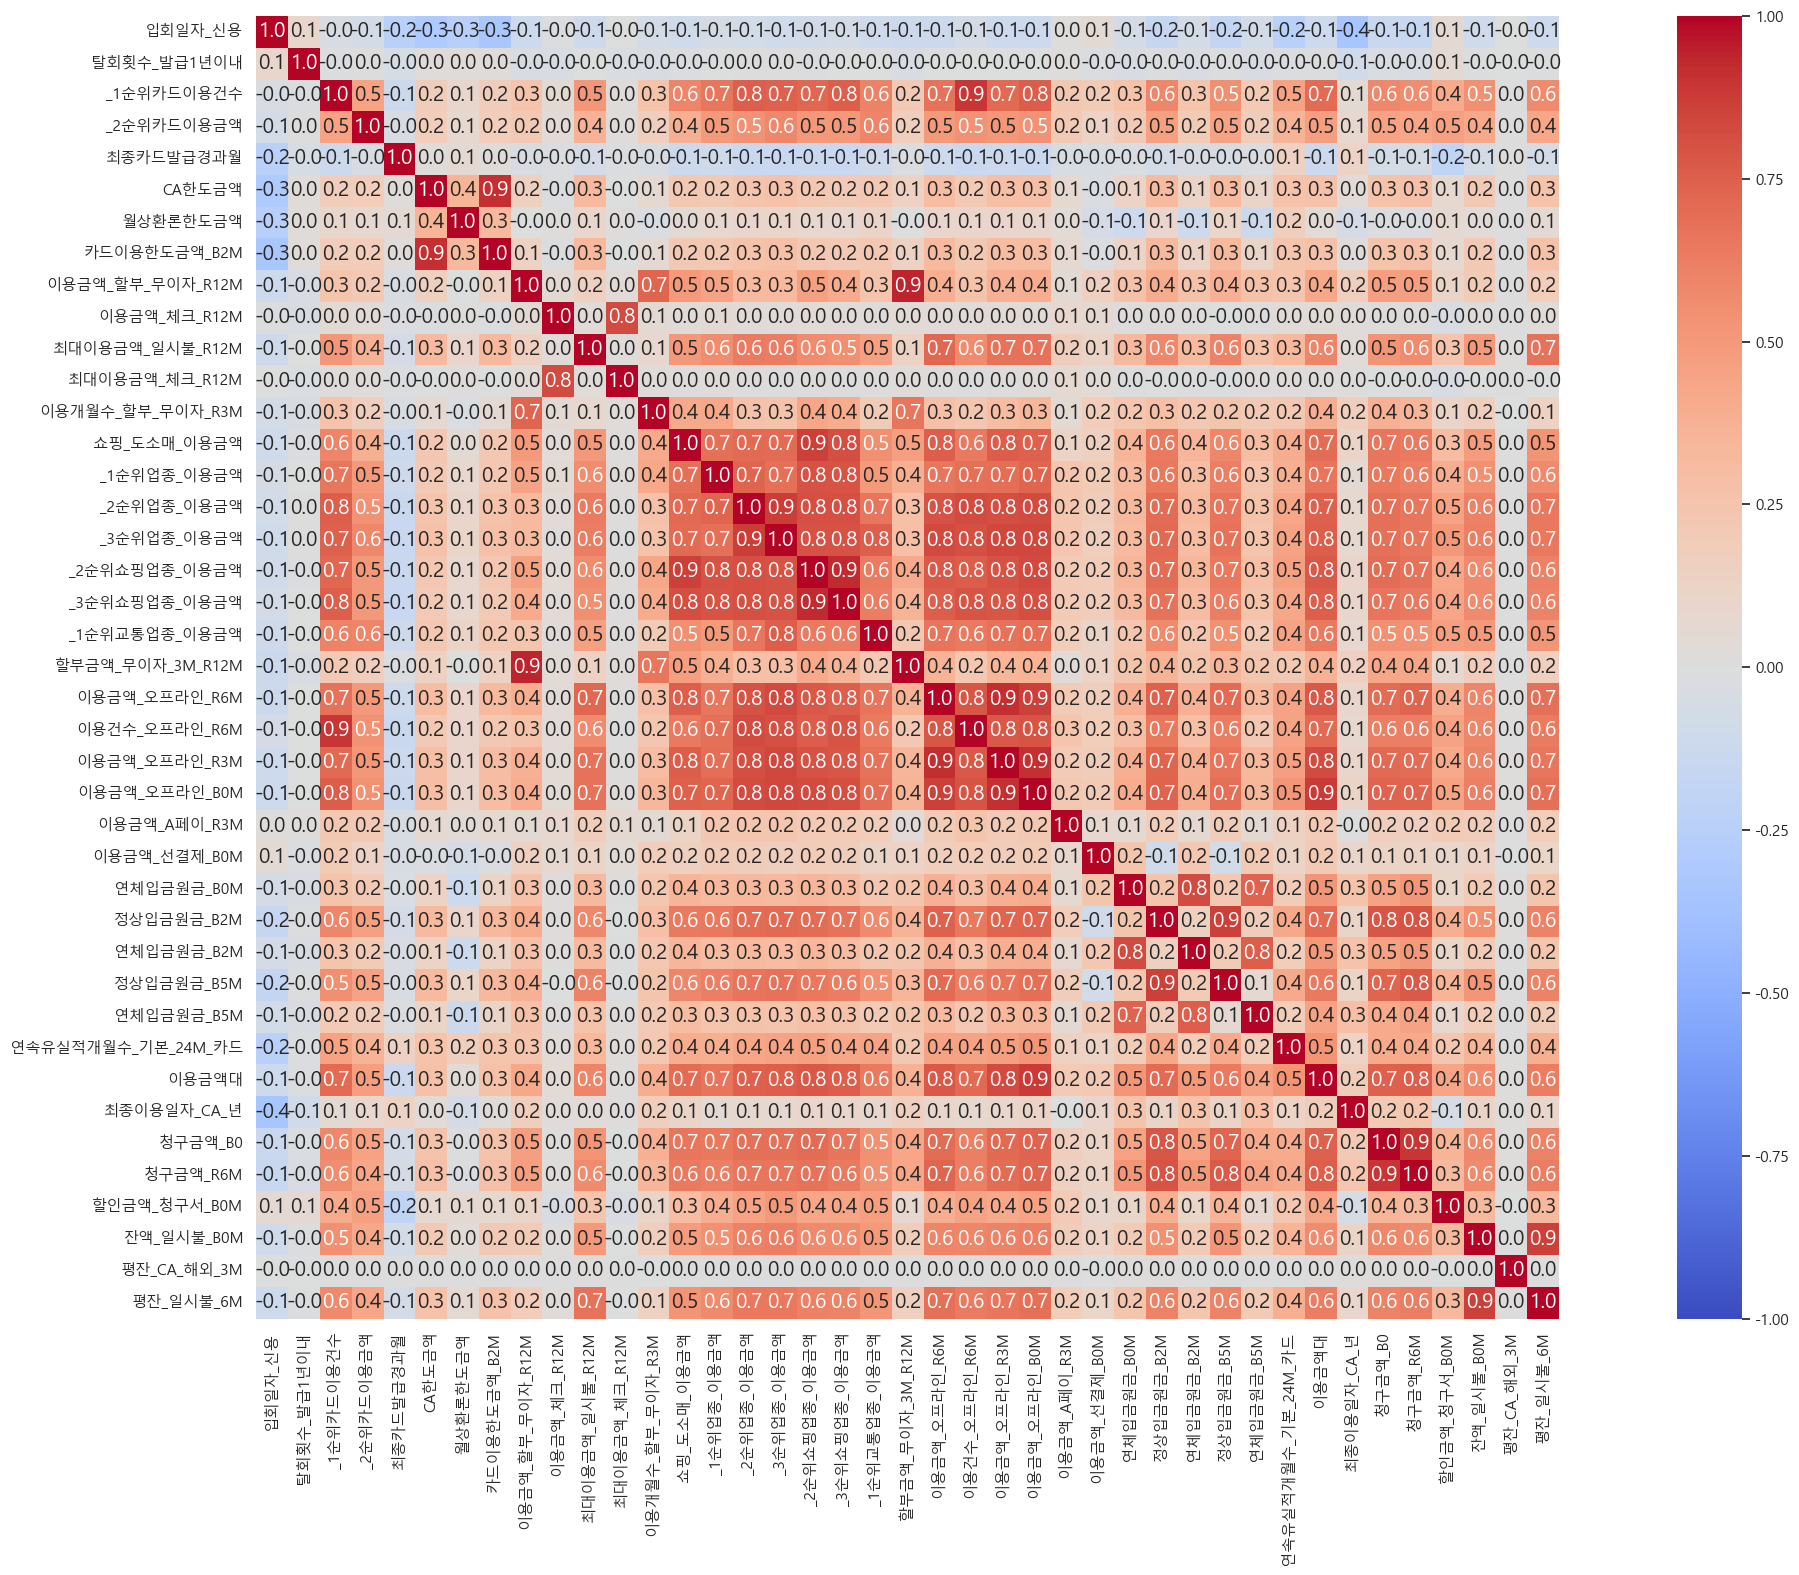

In [7]:
plt.figure(figsize=(24, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True, vmin=-1, vmax=1)
plt.tight_layout()
plt.show()